In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [6]:
df=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\KPI_touristique.csv")
trands=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\src\\Google Trend\\data\\trends.csv")

In [7]:
trands

,Date,dollar in moroccan dirham,moroccan oil protect and prevent spray,good food recipes,merzouga tour,morocco travel update,traditional moroccan food,morocco covid travel,moroccan oil gift set,bbc good food crumble,...,casablanca london,spain portugal morocco itinerary,moroccan food toronto,taj moroccan food,marrakech souks,best months to visit morocco,morocco food,moroccan restaurant,moroccan restaurants london,moroccan oil shampoo and conditioner
0,01-2010,0,0,99,0,0,100,0,0,0,...,83,0,0,0,40,0,27,91,100,0
1,02-2010,0,0,100,0,0,0,0,0,0,...,100,0,0,0,0,0,30,93,68,0
2,03-2010,0,0,96,0,0,79,0,0,0,...,77,0,0,0,42,0,32,86,0,0
3,04-2010,0,0,84,0,0,0,0,0,0,...,76,0,0,0,55,0,24,86,51,20
4,05-2010,0,0,79,0,39,0,0,0,22,...,73,0,0,0,48,0,27,88,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,02-2025,33,0,23,100,0,68,0,0,41,...,72,0,0,100,97,0,45,48,0,27
170,03-2025,39,71,20,95,0,70,0,0,46,...,63,0,0,0,96,0,41,60,14,25
171,04-2025,50,0,20,79,0,45,0,0,47,...,71,0,0,0,100,0,42,52,0,28
172,05-2025,43,0,19,63,0,58,0,0,43,...,72,54,0,87,97,91,44,50,0,26


In [10]:
trands=trands[:len(trands)-2]
trands['Date'] = pd.to_datetime(trands['Date'])
df['date'] = pd.to_datetime(df['date'])


In [12]:
df.isnull().sum()

date                  0
TES                   0
MRE                  12
Total Arrivées       12
Nuité                24
Taux d'occupation    72
dtype: int64

In [13]:
def filter_tourism_keywords(keywords):
    """Garde uniquement les mots-clés touristiques pertinents"""
    import re
    
    # Mots-clés à EXCLURE (non-touristiques)
    EXCLUDE = [
        r'\b(oil|argan|beauty|cosmetic|shampoo|body|hair)\b',
        r'\b(recipe|food|chilli|chocolate|cake|cooking)\b',
        r'\b(bbc|news|article|blog|instagram|facebook)\b',
        r'\b(price|buy|shop|store|amazon|ebay)\b',
        r'\b(job|work|salary|visa application)\b',
    ]
    
    # Mots-clés à INCLURE (touristiques)
    INCLUDE = [
        r'\b(hotel|riad|resort|accommodation|stay|booking)\b',
        r'\b(flight|airport|airline|ticket|travel)\b',
        r'\b(tour|excursion|visit|guide|itinerary|trip)\b',
        r'\b(marrakech|casablanca|fez|chefchaouen|essaouira|tangier|agadir)\b',
        r'\b(sahara|desert|atlas|medina|kasbah|souk)\b',
        r'\b(weather|temperature|climate|best time)\b',
        r'\b(things to do|places to visit|attractions)\b',
        r'\b(restaurant|cuisine|dining)\b',
        r'\b(beach|mountain|hiking|surfing|activities)\b',
    ]
    
    filtered = []
    for kw in keywords:
        kw_lower = kw.lower()
        
        # Exclure si non-touristique
        if any(re.search(pattern, kw_lower) for pattern in EXCLUDE):
            continue
        
        # Inclure si touristique
        if any(re.search(pattern, kw_lower) for pattern in INCLUDE):
            filtered.append(kw)
    
    return filtered

In [17]:
trands=trands.rename(columns={"Date":"date"})
l=trands.columns.tolist()
l.remove("date")

In [18]:
keywords_cleaned = filter_tourism_keywords(l)
print(len(keywords_cleaned))
trands=trands[["date"] + keywords_cleaned]
data=pd.merge(trands, df[['date','TES']], on="date")

490


In [19]:
data

,date,merzouga tour,morocco travel update,morocco covid travel,marrakech weather forecast,longue vie hotel marrakech,wydad casablanca,restaurant marrakech kassel,flights to casablanca morocco,marrakech meteo,...,14 day morocco itinerary,tangier morocco map,location riad marrakech,marrakech weather by month,casablanca london,spain portugal morocco itinerary,marrakech souks,best months to visit morocco,moroccan restaurant,TES
0,2010-01-01,0,0,0,76,0,4,0,79,50,...,0,100,88,0,83,0,40,0,91,291608.0
1,2010-02-01,0,0,0,100,0,5,0,63,64,...,0,60,85,0,100,0,0,0,93,327017.0
2,2010-03-01,0,0,0,98,0,5,0,67,60,...,0,81,89,0,77,0,42,0,86,437338.0
3,2010-04-01,0,0,0,51,0,9,0,38,45,...,0,71,68,0,76,0,55,0,86,432338.0
4,2010-05-01,0,39,0,46,0,9,0,66,40,...,0,70,75,0,73,0,48,0,88,430974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2024-10-01,78,0,0,16,77,10,0,68,88,...,0,33,21,66,63,51,91,0,49,871449.0
166,2024-11-01,79,0,0,18,63,11,0,70,51,...,0,32,27,65,69,38,91,0,51,720467.0
167,2024-12-01,71,0,0,14,52,16,49,60,57,...,0,32,13,63,81,0,64,0,50,784192.0
168,2025-01-01,88,0,0,14,89,8,0,87,49,...,0,37,29,100,72,57,94,0,55,624848.0


In [20]:
l=data.columns.tolist()
l.remove("date")
data=data[l]

### Calcul des corrélations avec décalages temporels


In [21]:
dataframe = data

target_col = 'TES'  
keyword_cols = [col for col in dataframe.columns if col != target_col]

results = []


for keyword in keyword_cols:
    correlations = {}
    
    # Tester différents lags (0 à 12 mois)
    for lag in range(1, 13):
    # Décaler la série du keyword
    
        keyword_lagged = dataframe[keyword].shift(lag)

        # Supprimer les valeurs manquantes
        valid_idx = ~(keyword_lagged.isna() | dataframe[target_col].isna())

        if valid_idx.sum() > 10:  # S'assurer qu'il y a assez de données
            # Calculer la corrélation de Pearson
            corr, p_value = pearsonr(
                keyword_lagged[valid_idx], 
                dataframe[target_col][valid_idx]
            )
            correlations[lag] = {
                'correlation': corr,
                'p_value': p_value
            }
    
    # Trouver le lag optimal (corrélation maximale)
    if correlations:
        best_lag = max(correlations.keys(), 
                      key=lambda x: abs(correlations[x]['correlation']))
        best_corr = correlations[best_lag]['correlation']
        best_pvalue = correlations[best_lag]['p_value']
        
        results.append({
            'keyword': keyword,
            'best_lag': best_lag,
            'correlation': best_corr,
            'p_value': best_pvalue,
            'all_correlations': correlations
        })

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('correlation', 
                                    key=abs, 
                                    ascending=False)

print(results_df[['keyword', 'best_lag', 'correlation', 'p_value']])

C:\Users\masta\AppData\Local\Temp\ipykernel_10164\94221215.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(


                                keyword  best_lag  correlation       p_value
227                           marrakech         1     0.779748  8.612392e-36
204                   marrakech airport         1     0.774369  5.048721e-35
39                       marrakech souk         1     0.749498  9.935153e-32
487                     marrakech souks         1     0.743878  4.878693e-31
217                     morocco airport         1     0.739769  1.521257e-30
..                                  ...       ...          ...           ...
76        moroccan restaurant st albans        12     0.057068  4.763260e-01
463          casablanca morocco tourism         8    -0.047817  5.456775e-01
198     spain morocco itinerary 10 days         8     0.046257  5.588740e-01
112         moroccan restaurant seattle        11    -0.043055  5.899732e-01
135  marrakech weather forecast 21 days         1          NaN           NaN

[490 rows x 4 columns]


### Sélection des variables finales

In [22]:
# Filtrer les keywords avec corrélation >= 70% (0.7)
threshold = 0.7
selected_keywords = results_df[
    abs(results_df['correlation']) >= threshold
].copy()

print(f"\nNombre de keywords sélectionnés avec corrélation >= 70% : {len(selected_keywords)}")
print("\nKeywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']])

# Créer le dataset final avec les variables décalées
final_df = dataframe[[target_col]].copy()

for _, row in selected_keywords.iterrows():
    keyword = row['keyword']
    lag = row['best_lag']
    #final_df[f"{keyword}_lag{lag}"] = dataframe[keyword].shift(lag)
    final_df[f"{keyword}"] = dataframe[keyword].shift(lag)
# Supprimer les lignes avec valeurs manquantes
final_df = final_df.dropna()

#print(f"\nDataset final: {final_df.shape}")
#final_df[selected_keywords['keyword'].head(3)].to_csv('dataset_final_avec_lags.csv', index=False)
print()
print("="*80)
print("\nTop 3 keywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']].head(3))


Nombre de keywords sélectionnés avec corrélation >= 70% : 8

Keywords sélectionnés:
                        keyword  best_lag  correlation
227                   marrakech         1     0.779748
204           marrakech airport         1     0.774369
39               marrakech souk         1     0.749498
487             marrakech souks         1     0.743878
217             morocco airport         1     0.739769
408        aeropuerto marrakech         1     0.716602
230                   essaouira         1     0.710293
188  best time to visit vietnam         1     0.703797


Top 3 keywords sélectionnés:
               keyword  best_lag  correlation
227          marrakech         1     0.779748
204  marrakech airport         1     0.774369
39      marrakech souk         1     0.749498


<Axes: >

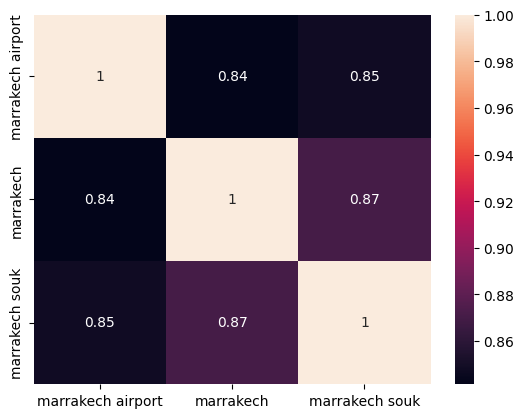

In [24]:
matrice = data[["marrakech airport","marrakech","marrakech souk"]].corr()
sns.heatmap(matrice,annot=True)